In Notebook 11, we got acquainted with the concepts of convex sets and convex functions. Next, in Notebook 12, I also presented convex optimization problems and how to identify them. In this lesson, we will continue to approach in more depth: the conditions on the solutions of optimization problems, both convex and non-convex; dual problems and KKT conditions.

First, we start with simple techniques for basic problems. You may have heard of this technique: the method of Lagrange multipliers. This is a method to find the extreme points of the objective function on the feasible set of the problem.

Recall math problem with constraint:

$$x = \arg \min_x f_0(x) \\
\text{ subject to } f_1(x) = 0$$

# Lagrange methods

If we can reduce this problem to an unconstrained problem, we can find the solution by solving the system of derivative equations with each component equal to 0 (assuming that solving this system of equations is feasible).

This method is the main motivation for mathematician Joseph-Louis Lagrange to develop the method of Lagrange multipliers $\mathcal{L}(x, \lambda) = f_0(x) + \lambda_1(x)$. Attention that, in this function, we have a new variable $\lambda$, which is the Lagrange multiplier.

$\mathcal{L}(x, \lambda)$ is called the **auxiliary function** or the **Lagrangian**

The above problem with constraint already been proved that the *optimal value* already satisfy $\nabla_{x, \lambda} \mathcal{L}(x, \lambda) = 0$. (I will skip this part). Thus:

$$
\begin{align*}
\nabla_x f_0(x) + \lambda \nabla_x f_1(x) &= 0 \\
f_1(x) &= 0
\end{align*}
$$

Solving equation above, in general, it's more simple than solving the original problem (with constraint). Let's see an example:

**Example 1**: Find the maximum and minimum values of $f_0(x, y) = x + y$ satisfying the constraint $f_1(x, y) = x^2 + y^2 = 2$. You will quickly notice that this is not a convex optimization problem because feasible set $x^2 + y^2 = 2$ is not a convex set. But we can still use the Lagrange method to solve this problem.

**Solution**:

Lagragian of this prblem is: $\mathcal{L}(x, y, \lambda) = x + y + \lambda(x^2 + y^2 - 2)$. The extreme points of the Lagrange function must satisfy the conditions ($\frac{\partial \mathcal{L}}{\partial x} = 0$, $\frac{\partial \mathcal{L}}{\partial y} = 0$, $\frac{\partial \mathcal{L}}{\partial \lambda} = 0$). Thus:

$$
\nabla_{x, y, \lambda} \mathcal{L}(x, y, \lambda) = 0 \iff
\begin{cases}
    1 + 2\lambda x = 0 \\
    1 + 2\lambda y = 0 \\
    x^2 + y^2 = 2
\end{cases}
$$

With first two cases, you can find $x = y = \frac{-1}{2\lambda}$, then replace in the last cases, we will solve $\lambda^2 = \frac{1}{4} \Rightarrow \lambda = \pm \frac{1}{2}$. Thus, we have two pairs of solution $(x, y) \in \{(1, 1), (-1, -1)\}$. By replacing these values in the original function, we can find the maximum and minimum values.


**Example 2** Cross-Entropy. In Softmax Regression Notebook, we already know that the cross-entropy loss. We have also seen that the cross entropy function is used to measure the similarity of two probability distributions, with the smaller the value of this function, the closer the two probabilities are to each other. We have also stated that the minimum value of the cross entropy function is achieved when each pair of probabilities is similar. Now, let me restate and prove the above statement.

Given distributions $p = [p_1, p_2, \cdots, p_n]$ and $q = [q_1, q_2, \cdots, q_n]$, with $p_i \in [0, 1]$ and $\sum_{i=1}^n p_i = 1$ and $q_i \neq 0, \forall i$. The cross-entropy function is defined as:

$$f_0(q) = -\sum_{i=1}^n p_i \log q_i$$

Find Q that minimizes $f_0(q)$ subject to $\sum_{i=1}^n q_i = 1$.

**Solution**:

In this problem, we have a constraint $\sum_{i=1}^n q_i = 1$. We can use the Lagrange method to solve this problem. The Lagrangian of this problem is:

$$\mathcal{L}(q, \lambda) = -\sum_{i=1}^n p_i \log q_i + \lambda(\sum_{i=1}^n q_i - 1)$$

With:

$$
\nabla_{q_1, q_2, \cdots, q_n, \lambda} \mathcal{L}(q, \lambda) = 0 \iff
\begin{cases}
    -\frac{p_i}{q_i} + \lambda = 0, \forall i \\
    \sum_{i=1}^n q_i = 1
\end{cases}

From first case, we have $p_i = \lambda q_i$. Then:

$$1 = \sum_{i=1}^n p_i = \lambda \sum_{i=1}^n q_i = \lambda$$

So that $q_i = p_i, \forall i$. Thus, the minimum value of the cross-entropy function is achieved when $q = p$.

# The Lagrange dual function

### Lagrangian

Allow me to recall the problem 1 more time, the general form of the optimization problem with constraints:

$$
x = \arg \min_x f_0(x) \\
\begin{align*}
\text{ subject to } f_i(x) &\leq 0, i = 1, 2, \cdots, m \\
h_j(x) &= 0, j = 1, 2, \cdots, p
\end{align*}
$$

With defined domain $\mathcal{D} = (\cap_{i=0}^m \text{dom} f_i) \cap (\cap_{j=1}^p \text{dom} h_j)$. Attention that, we are not assuming convexity of the optimization function or the constraint functions here. The only assumption here is that $\mathcal{D} \neq \emptyset$.

The Lagrangian is also constructed similarly with each Lagrange multiplier for a (non) constrained equation:

$$\mathcal{L}(x, \lambda, \nu) = f_0(x) + \sum_{i=1}^m \lambda_i f_i(x) + \sum_{j=1}^p \nu_j h_j(x)$$

With $\lambda = [\lambda_1, \lambda_2, \cdots, \lambda_m]$; $\nu = [\nu_1, \nu_2, \cdots, \nu_p]$ is vectors, called by *dual variables* or *Lagrange multipliers vectors*.

So if $x \in \R^n$ then the summary of variable of this function is $n + m + p$.

### Lagrangian dual function

The dual function Lagrange of optimization problem is a function of dual variables, defined as the smallest value according to $x$ of the Lagrangian:

$$
\begin{align*}
g(\lambda, \nu) &= \inf_{x \in \mathcal{D}} \mathcal{L}(x, \lambda, \nu) \\
&= \inf_{x \in \mathcal{D}} (f_0(x) + \sum_{i = 1}^{m} \lambda_i f_i(x) + \sum_{j = 1}^{p} \nu_jh_j(x))
\end{align*}
$$

Where:
- $\inf$ defined $x \in \mathcal{D}$, thus the domain of determination of the problem. This one different from the feasible set. Usually, the feasible set is a subset of the domain $\mathcal{D}$.
- With each $x$, Lagrangian is a affine of $(\lambda, \nu)$, which concave function. So, the dual function is the pointwise infimum of (possibly infinite) concave functions, i.e. a concave function. So the dual function of any optimization problem is a concave function, regardless of whether the original problem is convex or not.


I realize that this part (Duality) and Convex Optimization are the most difficult parts of optimization. I will try to explain it and finish this notebook in the future.

### Lower bound of optimal value

If $p^*$ is optimal value of general optimization problem, then with any dual variables $\lambda_i \geq 0, \forall i$ and $\nu$, we have:

$$g(\lambda, \nu) \leq p^*$$

We can easily prove this, assume $x_0$ is a random point in the feasible set of the problem, then:

$$
\begin{align*}
&\sum_{i=1}^m \lambda_i f_i(x_0) + \sum_{j=1}^p \nu_j h_j(x_0) \leq 0 \\
&\Rightarrow \mathcal{L}(x_0, \lambda, \nu) \leq f_0(x_0)
\end{align*}
$$

This is true for all $x_0 \in \mathcal{D}$, so that we have a very important conclusion:

$$g(\lambda, \nu) = \inf_{x \in \mathcal{D}} \mathcal{L}(x, \lambda, \nu) \leq \mathcal{L}(x_0, \lambda, \nu)\leq f_0(x), \forall x \in \mathcal{D}$$

### Example

$$
x = \arg \min_x x^2 + 10sin(x) + 10
\text{ subject to } (x - 2)^2 \leq 4
$$

With this problem, the domain is $\mathcal{D} \in \mathbb{R}$, but feasible set is $x \in [0, 4]$. The Lagrangian of this problem is:

$$\mathcal{L}(x, \lambda) = x^2 + 10\sin(x) + 10 + \lambda((x - 2)^2 - 4)$$

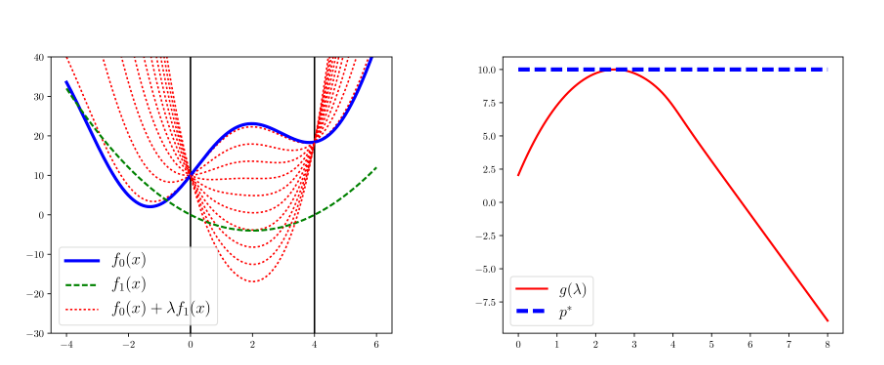

The red dotted lines in figure above are the lines corresponding to different $\lambda$. The region bounded between the two black vertical lines represents the feasible region of the optimization problem.

With each $\lambda$, dual function is defined as:

$$g(\lambda) = \inf_{x} (x^2 + 10\sin(x) + 10 + \lambda((x - 2)^2 - 4)), \lambda \geq 0$$

On the left side of the figure, we can see that with different $\lambda$, $g(\lambda)$ either at a point with an abscissa equal to 0, or at a point lower than the optimal point of the problem. The graph of the function $g(\lambda)$ is shown on the right side of the figure. The function $g(\lambda)$ is a concave function, and the optimal value of the original problem is the maximum value of the function $g(\lambda)$. With this we can conclude two things:
- The solid red line is always below (or overlaps) the dashed blue line.
- $g(\lambda)$ have a concave form, thus if we flip this graph by top-down, we will have a convex function.

Let's take a look in another problem (LP):

$$
x = \arg \min_x c^Tx \\
\begin{align*}
\text{ subject to } &Ax = b \\
&x \succeq 0
\end{align*}
$$

Lagrangian of this problem is:

$$
\begin{align*}
\mathcal{L}(x, \lambda, \nu) &= c^Tx - \sum_{i = 1}^n \lambda_ix_i + \nu^T(Ax - b) \\
&= -b^T\nu + (c + A^T\nu - \lambda)^Tx
\end{align*}
$$

Dual function is:

$$
\begin{align*}
g(\lambda, \nu) &= \inf_{x} \mathcal{L}(x, \lambda, \nu) \\
&= -b^T\nu + \inf_{x} (c + A^T\nu - \lambda)^Tx
\end{align*}
$$

Notice that a linear function 